In [9]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

In [10]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [11]:
df = pd.read_csv('2-preprocessing/lol/news-full.csv', dtype={'date': 'str'}).dropna()
df.vod = df.vod.astype('int32')
df

,date,date_input,date_modify,ranking,thumbnail,title,lede,office,contents,vod,view
0,20150801,20150801 00:49,20150801 00:49,1,1,[롤챔스 핫매치 리뷰] '불량 학생' 노동현의 수능 대박 스토리,"""탈선했어요!""""수능 만점!"" 2015년 7월 31일, KOO 타이거즈와 kt 롤스...",인벤,"""탈선했어요!"". ""수능 만점!"". 2015년 7월 31일, KOO 타이거즈와 kt...",0,198042
1,20150801,20150801 23:32,20150801 23:32,2,1,"[롤챔스 섬머] 스베누 소닉붐 뉴클리어 - 사신 인터뷰, 앞으로는 승리만 안겨드리겠다",금일(1일) 롤챔스 섬머 시즌 사상 스베누 소닉붐이 첫 번째 승리를 기록했다. 15...,헝그리앱,금일(1일) 롤챔스 섬머 시즌 사상 스베누 소닉붐이 첫 번째 승리를 기록했다. 15...,0,8657
2,20150801,20150801 20:10,20150801 20:10,3,1,[롤챔스 섬머] 뱅 배준식 인터뷰. 솔로랭크를 올리는데는 멘탈이 중요!,Q. 오늘 승리한 소감은 어떻게 되나?오늘 경기에 오랜만에 배성웅(벵기)형와 이지훈...,헝그리앱,Q. 오늘 승리한 소감은 어떻게 되나? 오늘 경기에 오랜만에 배성웅(벵기)형와 이지...,0,416
3,20150801,20150801 23:31,20150801 23:31,4,1,"[롬챔스 섬머] 스베누 소닉붐, 꼴찌의 반격 개시! 그 동안 설움을 설욕한 대망의 ...",롤챔스 섬머 2경기 2세트는 기세를 올린 스베누 소닉붐이 승리를 가져갔다. 이 때문...,헝그리앱,롤챔스 섬머 2경기 2세트는 기세를 올린 스베누 소닉붐이 승리를 가져갔다. 이 때문...,0,0
4,20150801,20150801 21:58,20150801 21:58,5,1,"[롬챔스 섬머] 스베누 소닉붐, 한타 대승 기반으로 2세트 승리",롤챔스 섬머 2경기 2세트가 시작됐다. 1세트때 진에어 그린윙스에게 억눌린 스베누 ...,헝그리앱,롤챔스 섬머 2경기 2세트가 시작됐다. 1세트때 진에어 그린윙스에게 억눌린 스베누 ...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
51811,20200430,20200430 17:49,20200430 17:56,26,1,"[LCK 승강전] 다이브 받아치면 곧 승리! 샌드박스, 서라벌에 1세트 선승",30일 종각 LoL 파크에서 열린 열린 2020 LCK 섬머 스플릿 승강전 최종전 ...,인벤,30일 종각 LoL 파크에서 열린 열린 2020 LCK 섬머 스플릿 승강전 최종전 ...,0,1166
51812,20200430,20200430 16:14,20200430 16:31,27,1,"[롤챔스 승강전] 서라벌-샌드박스, 베스트 라인업으로 맞대결",LCK 2020 서머 최종전에서 대결하는 서라벌 게이밍(위)과 샌드박스 게이밍(사진...,데일리e스포츠,마지막 승강전에서 승리를 원하는 서라벌 게이밍과 샌드박스 게이밍이 승강전 내내 기용...,0,1057
51813,20200430,20200430 17:50,20200430 17:50,28,1,"‘일방적인 전투 승리’…샌드박스게이밍, 서라벌게이밍 상대로 1세트 승리",30일 ‘2020 우리은행 LCK Spring Split’ 승강전 최종진출전에서는 ...,엑스포츠뉴스,30일 ‘2020 우리은행 LCK Spring Split’ 승강전 최종진출전에서는 ...,0,835
51814,20200430,20200430 18:05,20200430 18:05,29,1,"[LCK 승강전] 샌드박스, 절묘한 카운터로 손쉽게 기선 제압",[OSEN=고용준 기자] LCK 최후의 승강전에서 샌드박스가 먼저 웃었다. 다이브 ...,OSEN,LCK 최후의 승강전에서 샌드박스가 먼저 웃었다. 다이브 공세를 절묘하게 받아치면서...,0,490


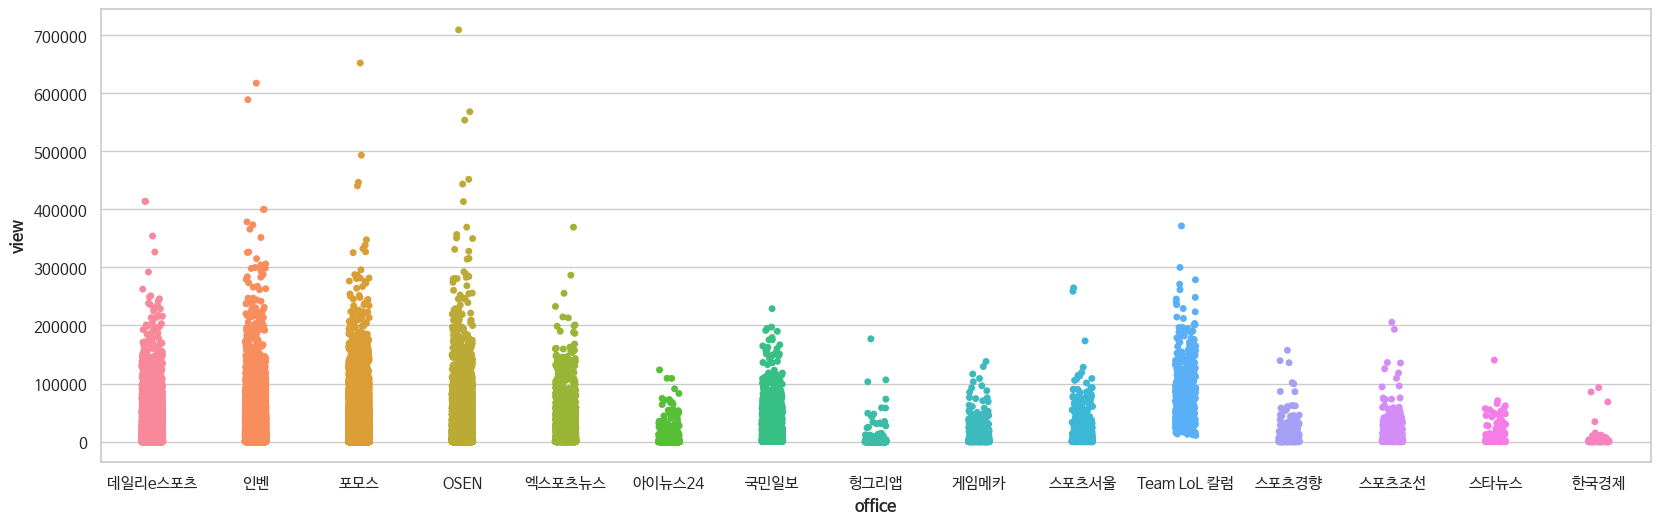

In [20]:
top_offices = df.office.value_counts()[:15]
top_office_df = df[df.office.apply(lambda x: x in top_offices)]

plt.rcParams['figure.figsize'] = [20.0, 6.0]
sns.stripplot(x='office', y='view', data=top_office_df, order=top_offices.keys())

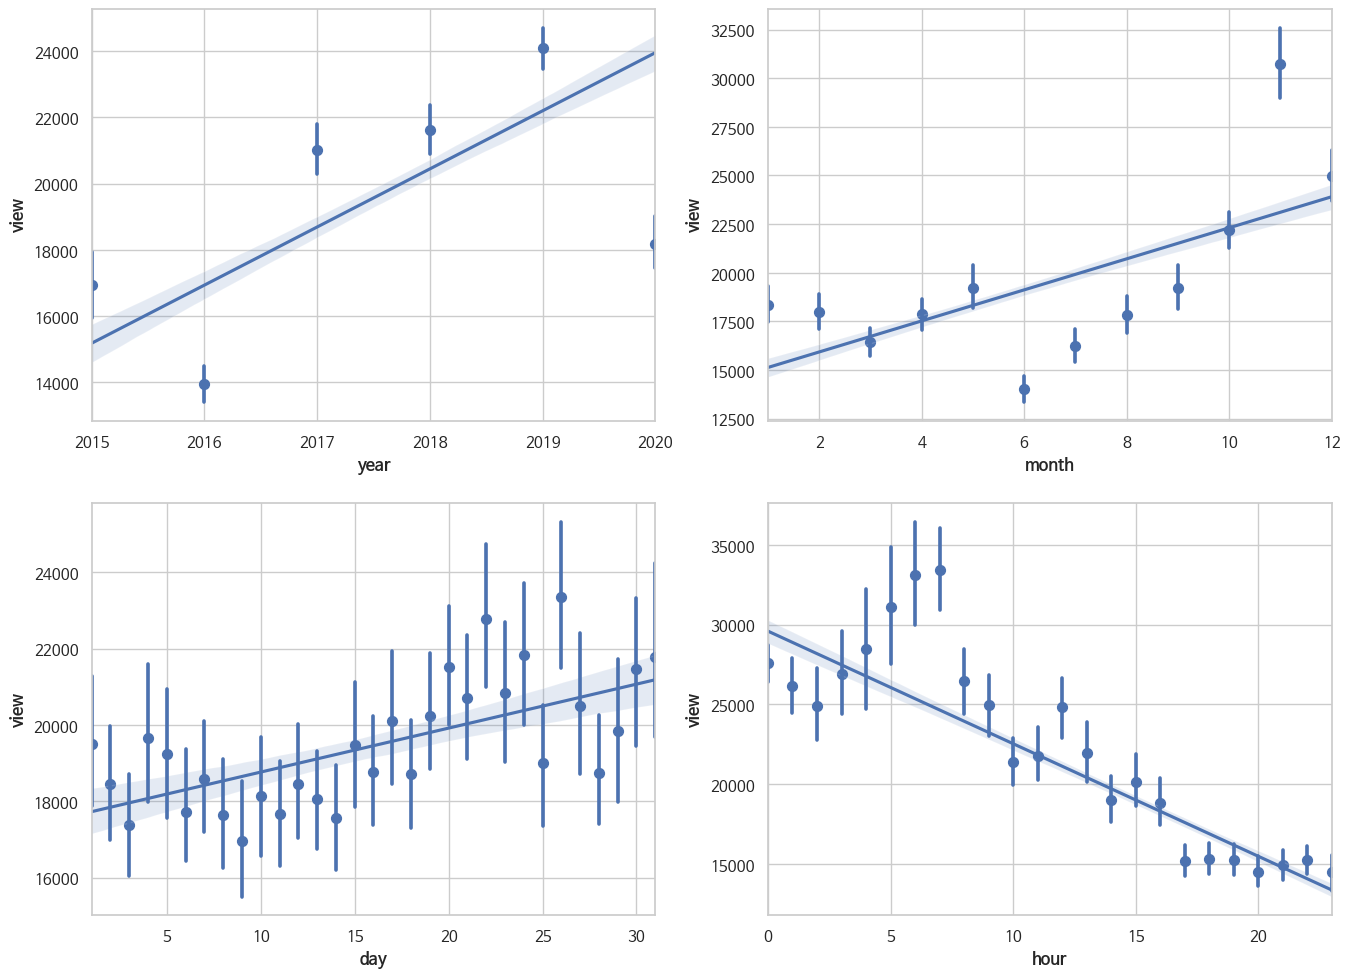

In [35]:
#dates = df.date_input.apply(lambda x: datetime.strptime(x, '%Y%m%d %H:%M'))
plt.rcParams['figure.figsize'] = [16.0, 12.0]

plt.subplot(221)
years = dates.apply(lambda x: x.year)
years.name = 'year'
sns.regplot(x=years, y=df.view, x_estimator=np.mean)

plt.subplot(222)
months = dates.apply(lambda x: x.month)
months.name = 'month'
sns.regplot(x=months, y=df.view, x_estimator=np.mean)

plt.subplot(223)
days = dates.apply(lambda x: x.day)
days.name = 'day'
sns.regplot(x=days, y=df.view, x_estimator=np.mean)

plt.subplot(224)
hours = dates.apply(lambda x: x.hour)
hours.name = 'hour'
sns.regplot(x=hours, y=df.view, x_estimator=np.mean)

In [21]:
df['year'] = df.date.apply(lambda x: int(str(x)[:4]))
df['month'] =  df.date.apply(lambda x: int(str(x)[4:6]))

rows = []
for y in range(2015, 2021):
    row = [y]
    for m in range(1, 13):
        if (y == 2015 and m < 8) or (y == 2020 and m > 4):
            mean = 0
        else:
            mean = int(df[(df.year == y) & (df.month == m)].view.mean())
        row.append(mean)
    rows.append(row)

df2 = pd.DataFrame(rows, columns=['year', *range(1, 13)])
df2.index = df2.pop('year')
df2.columns.name = 'month'

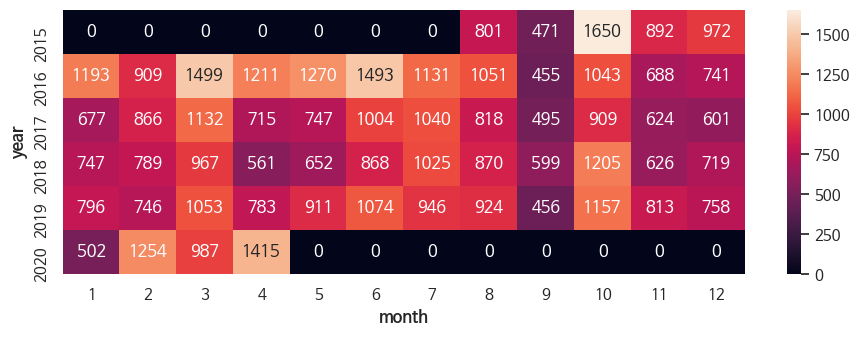

In [14]:
plt.rcParams['figure.figsize'] = [11.0, 3.5]
sns.heatmap(df2, annot=True, fmt='d')

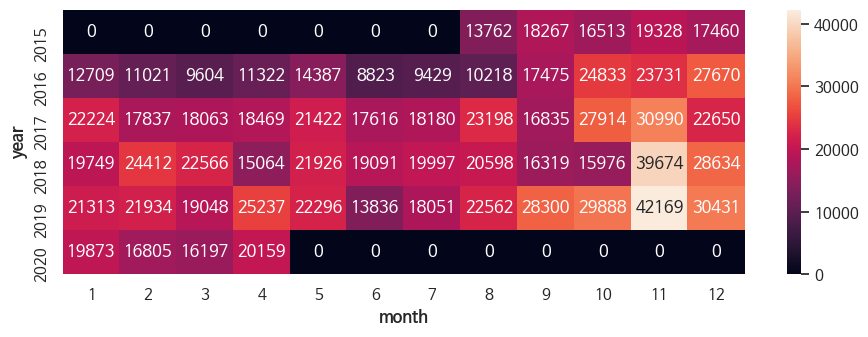

In [16]:
plt.rcParams['figure.figsize'] = [11.0, 3.5]
sns.heatmap(df2, annot=True, fmt='d')

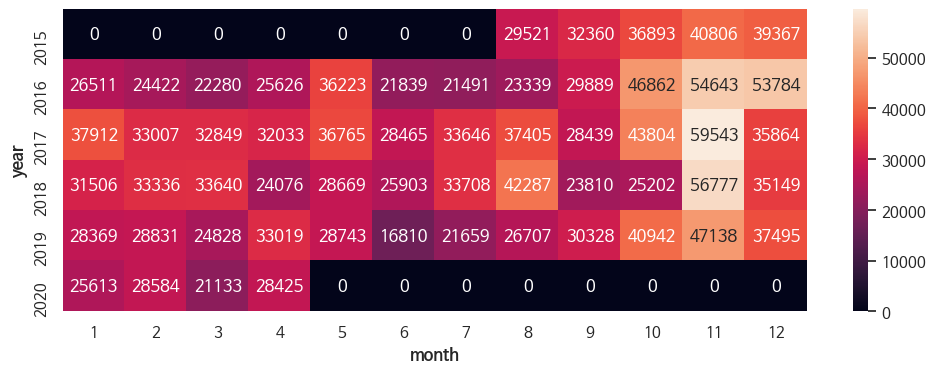

In [18]:
plt.rcParams['figure.figsize'] = [12.0, 4.0]
sns.heatmap(df2, annot=True, fmt='d')

In [23]:
df3 = pd.DataFrame(list(dict(df.office.value_counts()[:15]).items()), columns=['office', 'news'])

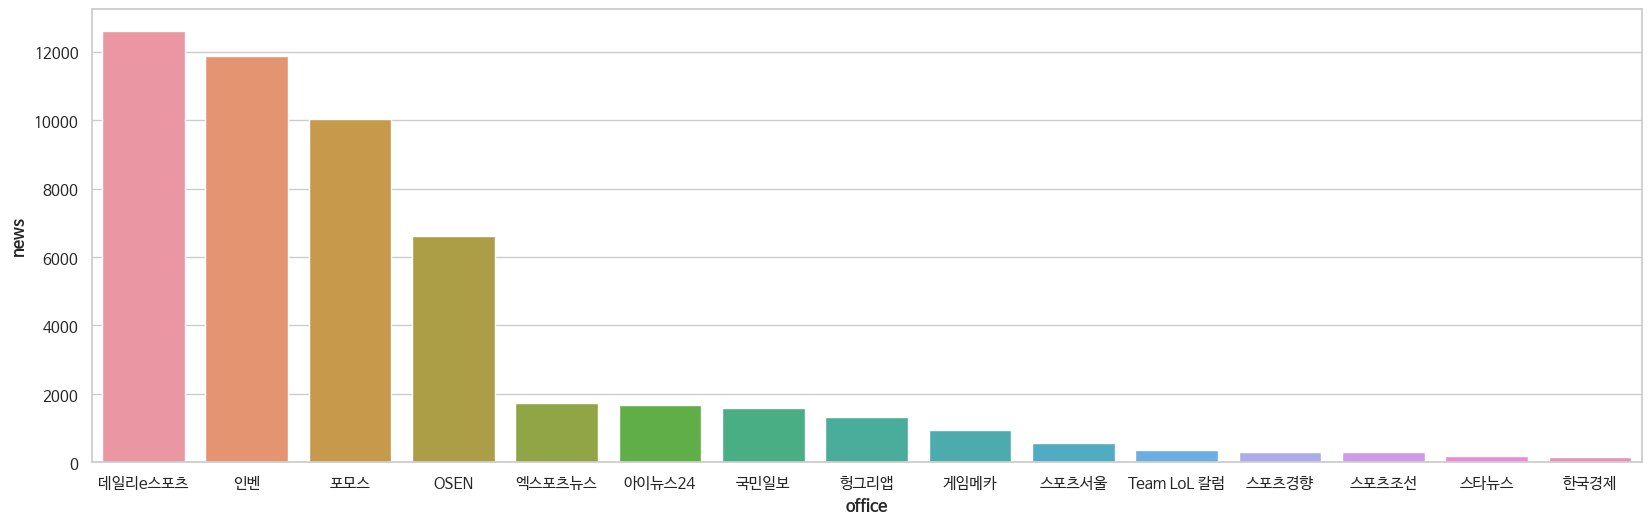

In [25]:
plt.rcParams['figure.figsize'] = [20, 6]
sns.barplot(data=df3, x='office', y='news')